# $\gamma$ spectroscopy using a BaF scintillator
scintillator dimensions: $15 \times 30 \times ?$ mm$^3$

In [1]:
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
from scipy.stats import gaussian_kde

%config InlineBackend.figure_format = 'retina'

In [2]:
data_path = '/Users/erezcohen/Desktop/data/PETsys/GammaSpectroscopy/BaF_spectroscopy/'
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/GammaSpectroscopy/Figures/'

# $^{22}$Na data
/Users/erezcohen/Desktop/data/PETsys/GammaSpectroscopy/BaF_spectroscopy/Na22_1800sec_single.dat
/Users/erezcohen/Desktop/data/PETsys/GammaSpectroscopy/BaF_spectroscopy/cosmic_1800sec_single.dat

In [4]:
dT = 1800
Na22fname = 'Na22_%dsec_single.dat'%dT
dT = 1800
Bkgfname = 'cosmic_%dsec_single.dat'%dT

In [5]:
Na22_singles = pd.read_csv(data_path+Na22fname,delimiter='\t',names=['time','charge','channel'])
Bkg_singles = pd.read_csv(data_path+Bkgfname,delimiter='\t',names=['time','charge','channel'])
channels = np.unique(Na22_singles.channel)
dT_Na22,dT_Bkg = dT,dT

## accumulate charge from all SiPMs in array in each event

In [8]:
Na22_singles[0:80]

time    charge  channel
0    581171211410  0.796650        3
1    648510699145  0.680241       10
2    648536123679  1.133839        3
3    871444050025  1.143307        8
4   1068650869607  1.322178       16
5   1113605024251  1.564255       43
6   1118856258399  0.741325       10
7   1196117624287  0.826015        7
8   1203867112801  1.034115       32
9   1242420721615  0.822235       59
10  1300369155219  1.208416        3
11  1314858729426  0.995899        0
12  1496950041620  0.687481       36
13  1587786469650  1.586506        3
14  1587786462138  2.364471       10
15  1678807645856  2.100243       27
16  1690429024035  0.355522       59
17  2019752271662  0.724281       63
18  2149629265933  0.685268       12
19  2235419427256  0.914162        3
20  2508140593456  1.093040       26
21  2517455087579  0.745102       61
22  2585454925800  0.731365       19
23  2754154798015  0.957047       19
24  2759491812736  0.768578       31
25  2772091615863  1.703106        5
26  2832417547952  0.644844       13
27  2848308982820  1.383644        5
28  2986557319972  0.927376       17
29  3049864612249  1.473503       10
..            ...       ...      ...
50  4662422274235  0.546482        7
51  4912631356318  0.274239       56
52  5042310305562  0.672585        2
53  5050187362959  0.860802       15
54  5268808863005  1.335724       20
55  5325614069402  1.334656        0
56  5414727970594  1.436554        5
57  5467775890660  1.423363       25
58  5470808131945  0.799343       18
59  5625937225468  0.929676       16
60  5830937802381  1.131630       17
61  5847866783095  0.899319       29
62  5918643040833  1.066589        0
63  6047582551309  0.620365        7
64  6061279604263  0.331829       59
65  6157867104881  0.963490       29
66  6256807982645  1.657349       31
67  6402470353202  0.658974       50
68  6546069066638  0.561871       13
69  6556088893281  0.814636        2
70  6818764343909  0.719791       33
71  6838578073535  1.119587       60
72  7046712906710  0.592236        7
73  7215885560682  0.936150       31
74  7264237872796  0.500465        7
75  7410166074071  3.807194       45
76  7435694200503  0.757584       59
77  7556910455679  0.938248       29
78  7703171821244  1.278618       31
79  7703171825118  1.414207       33

[80 rows x 3 columns]

In [38]:
t = np.sort(np.array(Na22_singles.time));
dt = np.diff(t);
np.min(dt)
print(t[0:20]/1e12)
print(dt[0:20]/1e3)

[0.58117121 0.6485107  0.64853612 0.87144405 1.06865087 1.11360502
 1.11885626 1.19611762 1.20386711 1.24242072 1.30036916 1.31485873
 1.49695004 1.58778646 1.58778647 1.67880765 1.69042902 2.01975227
 2.14962927 2.23541943]
[6.73394877e+07 2.54245340e+04 2.22907926e+08 1.97206820e+08
 4.49541546e+07 5.25123415e+06 7.72613659e+07 7.74948851e+06
 3.85536088e+07 5.79484336e+07 1.44895742e+07 1.82091312e+08
 9.08364205e+07 7.51200000e+00 9.10211762e+07 1.16213782e+07
 3.29323248e+08 1.29876994e+08 8.57901613e+07 2.72721166e+08]


## ADC spectrum - calibrated for energy deposition 

In [9]:
from scipy.signal import find_peaks


In [ ]:
# sum charge per event
for 

In [13]:
bins=np.linspace(0,60,120)
Na22singles, hNa22SigBkg, Bkgsingles, hBkg, hNa22Sig, hNa22Sig_err = dict(),dict(),dict(),dict(),dict(),dict()
hNa22Sig_tot = np.zeros(len(bins)-1)
for ch in channels: #{   
    # Na22 signal+background
    Na22singles[ch] = Na22_singles[Na22_singles.channel==ch]    
    hNa22SigBkg[ch],edges = np.histogram(Na22singles[ch].charge,bins=bins);
    # only background
    Bkgsingles[ch] = Bkg_singles[Bkg_singles.channel==ch]    
    hBkg[ch],edges = np.histogram(Bkgsingles[ch].charge,bins=bins);
    # Na22 signal
    hNa22Sig[ch] = np.array(hNa22SigBkg[ch] - hBkg[ch]*(dT_Na22/dT_Bkg))
    hNa22Sig_err[ch] = np.sqrt( np.array(hNa22SigBkg[ch] + hBkg[ch]*(dT_Na22/dT_Bkg)))     
    
    hNa22Sig_tot = hNa22Sig_tot + hNa22Sig[ch]
#}

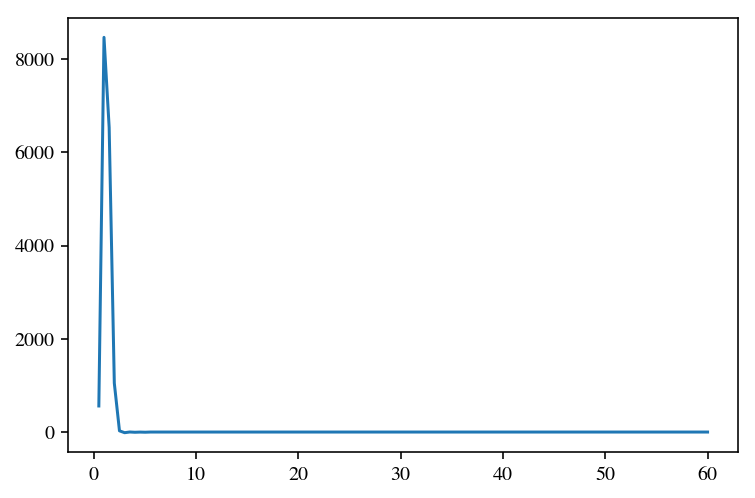

In [16]:
plt.plot(edges[1:],hNa22Sig_tot);

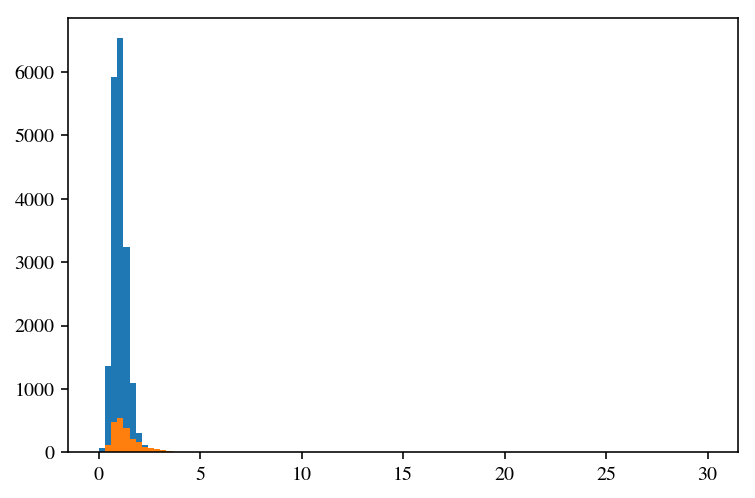

In [5]:
plt.hist(Na22_singles.charge,bins=np.linspace(0,30,100));
plt.hist(Bkg_singles.charge,bins=np.linspace(0,30,100));

In [15]:
# Epoly,x_keV,axes = calibrate_charge_2_keV_using_Na22_data(bins=np.linspace(0,58,150),
#                                                           data_path=data_path,
#                                                           Na22fname=Na22fname, dT_Na22 = dT,
#                                                           Bkgfname=Bkgfname, dT_Bkg = dT )
# axes[482].set_xlim(0,1400); axes[482].set_ylim(0,1650); axes[482].set_title('channel 482 - $^{22}$Na singles spectrum')
# axes[533].set_xlim(0,1400); axes[533].set_ylim(0,1250); axes[533].set_title('channel 533 - $^{22}$Na singles spectrum')
# save_figure(filename = main_figures_path + 'p1_22Na_singles_EdepCalibrated.pdf')

detected events in the following channels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
in channel  0 ,peaks at bins number []
peaks2use: [] Q_au: []


TypeError: expected non-empty vector for x